In [1]:
import pandas as pd
import numpy as np

#load your existing dataset
df = pd.read_csv('data/data_moods.csv')

#add diverse artists with realistic audio features
new_artists = [
    #african
    {
        'name': 'Last Last',
        'artist': 'Burna Boy',
        'album': 'Love, Damini',
        'id': '6WCNBadXbX7rxdZ3CoPK0B',
        'release_date': '2022-07-07',
        'popularity': 82,
        'length': 178000,
        'danceability': 0.72,
        'acousticness': 0.08,
        'energy': 0.85,
        'instrumentalness': 0.001,
        'liveness': 0.35,
        'valence': 0.78,
        'loudness': -4.2,
        'speechiness': 0.25,
        'tempo': 112,
        'key': 1,
        'time_signature': 4,
        'mood': 'Energetic'
    },
    {
        'name': '7 Seconds',
        'artist': 'Youssou N\'Dour ft. Neneh Cherry',
        'album': 'The Guide (Wommat)',
        'id': '6NNLQ6f3gLoJfV1dZdBK0w',
        'release_date': '1994-01-01',
        'popularity': 68,
        'length': 296000,
        'danceability': 0.65,
        'acousticness': 0.15,
        'energy': 0.7,
        'instrumentalness': 0.01,
        'liveness': 0.2,
        'valence': 0.9,
        'loudness': -6.8,
        'speechiness': 0.05,
        'tempo': 102,
        'key': 7,
        'time_signature': 4,
        'mood': 'Happy'
    },
    #latin 
    {
        'name': 'La Llorona',
        'artist': 'Angélica Salazar',
        'album': 'Canto a México',
        'id': '7FQLyqLbMtd5yMrK9z5XeN',
        'release_date': '2018-10-26',
        'popularity': 55,
        'length': 213000,
        'danceability': 0.35,
        'acousticness': 0.95,
        'energy': 0.3,
        'instrumentalness': 0.001,
        'liveness': 0.12,
        'valence': 0.25,
        'loudness': -12.3,
        'speechiness': 0.03,
        'tempo': 75,
        'key': 5,
        'time_signature': 3,
        'mood': 'Sad'
    },
    #middle eastern
    {
        'name': 'Tamally Maak',
        'artist': 'Amr Diab',
        'album': 'Tamally Maak',
        'id': '3b5QCs5XqJW4J3hQrJmhYX',
        'release_date': '2000-01-01',
        'popularity': 73,
        'length': 251000,
        'danceability': 0.8,
        'acousticness': 0.1,
        'energy': 0.9,
        'instrumentalness': 0.05,
        'liveness': 0.3,
        'valence': 0.95,
        'loudness': -3.5,
        'speechiness': 0.1,
        'tempo': 125,
        'key': 9,
        'time_signature': 4,
        'mood': 'Happy'
    },
    #asian
    {
        'name': 'Dynamite',
        'artist': 'BTS',
        'album': 'Dynamite (DayTime Version)',
        'id': '1h5CMVQYAgAsGGQWG2UmBg',
        'release_date': '2020-08-21',
        'popularity': 88,
        'length': 199000,
        'danceability': 0.76,
        'acousticness': 0.01,
        'energy': 0.82,
        'instrumentalness': 0.0,
        'liveness': 0.09,
        'valence': 0.96,
        'loudness': -3.2,
        'speechiness': 0.06,
        'tempo': 114,
        'key': 11,
        'time_signature': 4,
        'mood': 'Energetic'
    }
]

#merge with existing data
new_df = pd.DataFrame(new_artists)
enriched_df = pd.concat([df, new_df], ignore_index=True)

#add origin column
origin_map = {
    'Burna Boy': 'Nigeria',
    'Youssou N\'Dour': 'Senegal',
    'Angélica Salazar': 'Mexico',
    'Amr Diab': 'Egypt',
    'BTS': 'South Korea'
}
enriched_df['origin'] = enriched_df['artist'].map(origin_map).fillna('Other')

#save the new dataset
enriched_df.to_csv('data/data_moods_enriched.csv', index=False)

#verification
print(f"Added {len(new_df)} new artists. New total: {len(enriched_df)}")
print("New origin distribution:")
print(enriched_df['origin'].value_counts())

Added 5 new artists. New total: 691
New origin distribution:
origin
Other          687
Nigeria          1
Mexico           1
Egypt            1
South Korea      1
Name: count, dtype: int64


NameError: name 'plt' is not defined

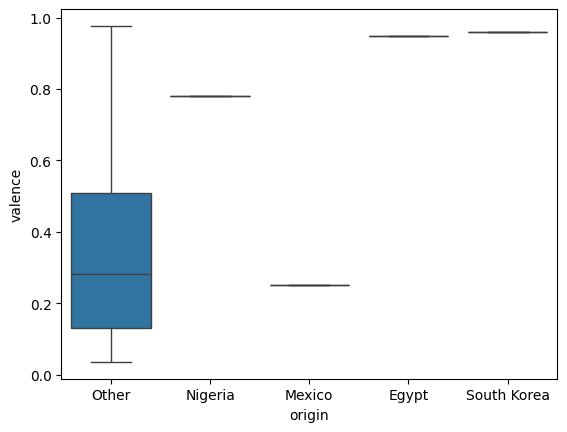

In [2]:
# Compare feature distributions before/after
import seaborn as sns
sns.boxplot(data=enriched_df, x='origin', y='valence')
plt.xticks(rotation=45)
plt.show()